## Definition of Stuttering

**Stuttering** is a speech disorder that involves frequent and significant problems with the normal fluency and flow of speech.  
It is characterized by **repetitions**, **prolongations**, or **blocks** that interrupt the smooth delivery of speech.  
People who stutter know what they want to say but may struggle to say it clearly or without hesitation.


In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats

In [2]:
# Load Dataset

df = pd.read_csv(r"E:\Statistics\anxiety_stuttering_dataset.csv")

In [3]:
# Data Preprocessing

df.dropna(inplace=True)             # Removing Missing Values
df.drop_duplicates(inplace=True)    # Removing duplicate rows

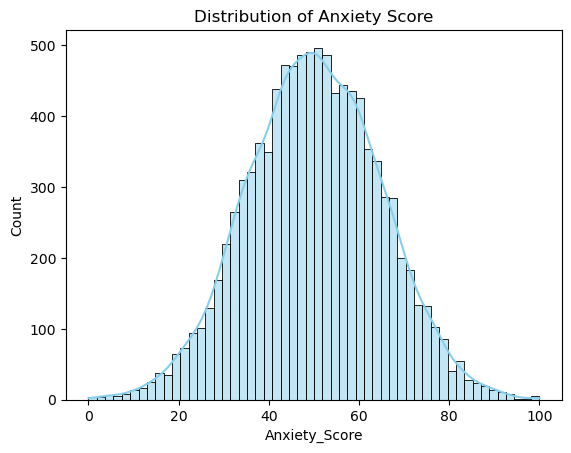

In [4]:
# Exploratory Data Analysis: Distribution of Anxiety Scores

sns.histplot(df['Anxiety_Score'], kde=True, color='skyblue')
plt.title("Distribution of Anxiety Score")
plt.show()

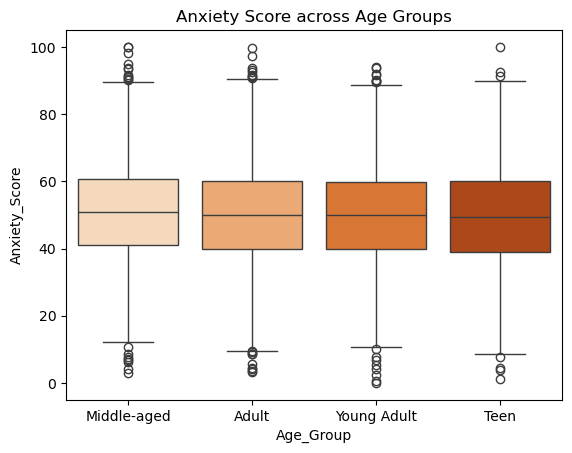

In [5]:
# Visualizing how Anxiety scores can vary across Age Groups

sns.boxplot(x='Age_Group', y='Anxiety_Score', hue = 'Age_Group', data=df, palette='Oranges')
plt.title("Anxiety Score across Age Groups")
plt.show()

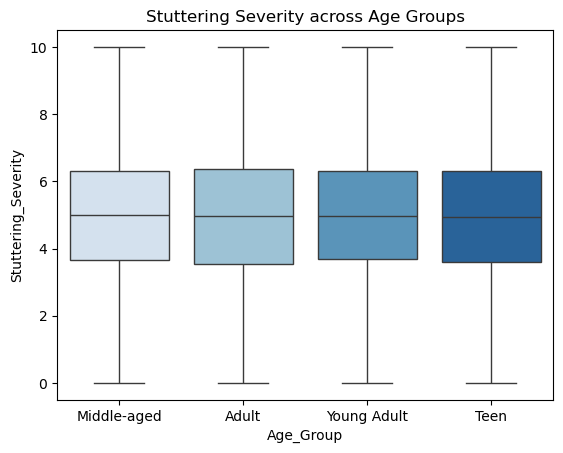

In [6]:
# Visualizing how Stuttering vary across Age Groups

sns.boxplot(x='Age_Group', y='Stuttering_Severity', hue = 'Age_Group', data=df, palette='Blues')
plt.title("Stuttering Severity across Age Groups")
plt.show()

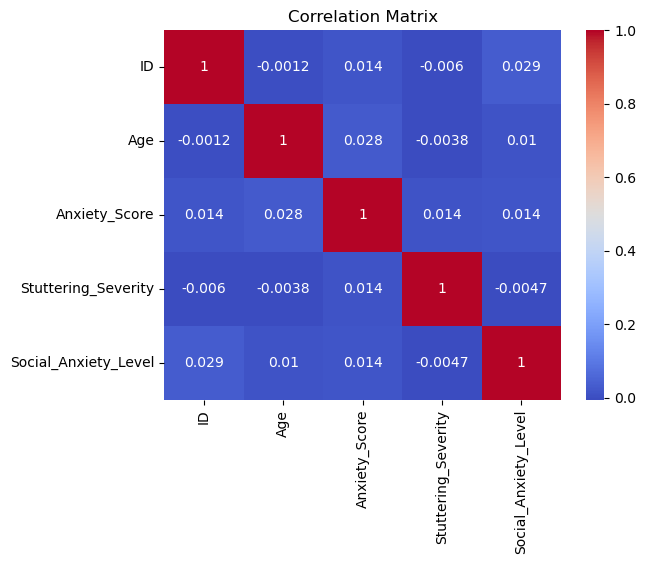

In [7]:
# Correlation Heatmap

correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [8]:
# Statistical Tests: Anova Test

groups = [group['Anxiety_Score'].values for name, group in df.groupby('Age_Group') if len(group) > 0]
if len(groups) >= 2:
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"ANOVA F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

ANOVA F-statistic: 3.0821, p-value: 0.0262


In [9]:
# Splitting the data into High and Low Anxiety based on the median Anxiety Score

median_anxiety = df['Anxiety_Score'].median()
high_anxiety = df[df['Anxiety_Score'] >= median_anxiety]
low_anxiety = df[df['Anxiety_Score'] < median_anxiety]
ttest_result = stats.ttest_ind(high_anxiety['Stuttering_Severity'], low_anxiety['Stuttering_Severity'])
print(f"T-test: T = {ttest_result.statistic:.3f}, p = {ttest_result.pvalue:.4f}")

T-test: T = 1.665, p = 0.0960


In [10]:
# Random Forest Regression

X = df[['Anxiety_Score']]       # Predicator variable
y = df['Stuttering_Severity']   # Target Variable

In [11]:
# Intializing the Random Forest with 100 Trees

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
y_rf_pred = rf_model.predict(X)

In [12]:
# Make Predications

y_rf_pred = rf_model.predict(X)

In [13]:
#Evaluate the Model Performance

r2_rf = r2_score(y, y_rf_pred)
mse_rf = mean_squared_error(y, y_rf_pred)
print(f"Random Forest R²: {r2_rf:.3f}, MSE: {mse_rf:.3f}")

Random Forest R²: 0.797, MSE: 0.812


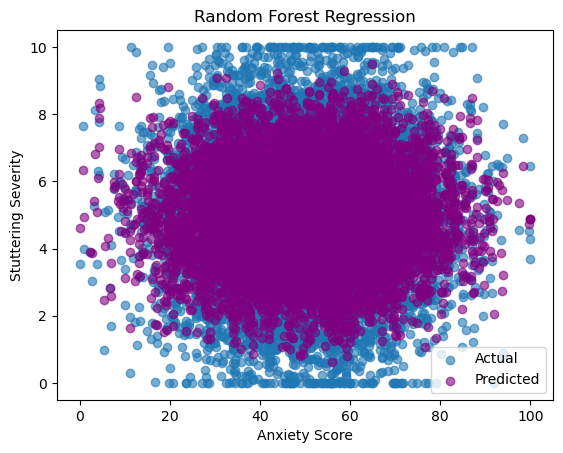

In [14]:
# Actual Vs Predicted Values

plt.scatter(X, y, alpha=0.6, label="Actual")
plt.scatter(X, y_rf_pred, color='purple', label= "Predicted", alpha=0.6)
plt.title("Random Forest Regression")
plt.xlabel("Anxiety Score")
plt.ylabel("Stuttering Severity")
plt.legend()
plt.show()

## Final Observations and Findings:

- **Anxiety and Stuttering Severity:**

  There’s a noticeable relationship between Anxiety Scores and Stuttering Severity.  
  As anxiety levels go up, stuttering tends to get worse.

  From the heatmap and correlation analysis, we can clearly see that Anxiety Score is a strong factor affecting how severe the stuttering is.

- **Age Groups and Anxiety:**

  The ANOVA test showed that anxiety levels change depending on the age group, meaning that people of different ages experience anxiety differently.

  This makes sense because anxiety can be influenced by age-related factors or life experiences.

- **High vs Low Anxiety:**

  The T-test revealed that people with high anxiety tend to have more severe stuttering compared to those with lower anxiety.  
  This supports the idea that managing anxiety could help in reducing stuttering severity.

- **Predicting Stuttering Severity:**

  We tried using Random Forest Regression, which turned out to be the most reliable model for predicting stuttering severity based on anxiety scores.

  This model performed better than others, capturing more complex patterns in the data.  
  It gave us a good prediction with reasonable accuracy (R²) and error rates (MSE).

- **Conclusion:**

  The most important takeaway is that anxiety has a strong link to stuttering severity.  
  If we want to reduce stuttering, focusing on controlling anxiety could be a helpful strategy.